In [477]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from sympy import *
init_printing()

# 1, 2, 5, 9, 10, 11, 12, 14,

# 1

In [478]:
Va, Vb, V1, C1, C2, R1, R2, t = symbols('Va Vb V1 C1 C2 R1 R2 t')

eqA = Eq( -C1*(Derivative(Va-V1, t)) + Va/R1 , 0) # from onenote
eqB = Eq( -( (Vb-Va) / R2) + C2*Derivative(Vb, t), 0) # from onenote

# Solve for Va
solutions = solve([eqA, eqB], (Va, Vb))

# Display the solutions
for var, sol in solutions.items():
    # print(f"{var}: {sol}")
    display(Eq(var, sol))



# 2

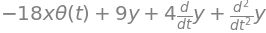

In [479]:
t = symbols('t', real=True)
y, x = symbols('y x')

# Define the step response
step = Derivative(Derivative(y, t ) ,t)  + 4 * Derivative(y, t) + 9*y - 18*x * Heaviside(t)
display(step)


# 3

In [480]:
s = symbols('s')
roots = solve(s**2 + 8*s + 16, s)
[float(root.evalf()) for root in roots]

In [481]:
s, t = symbols('s t')

# Define the Laplace-domain impulse response (ie H(s))
Y = (0 + 32*s) / (s**2 + 8*s + 16)  # 5*s^2 + 0*s^1 + 0  / ( s^2 + 5*s^1 + 5*s^0 )
h = inverse_laplace_transform(Y, s, t)
simplify(h)

# 4

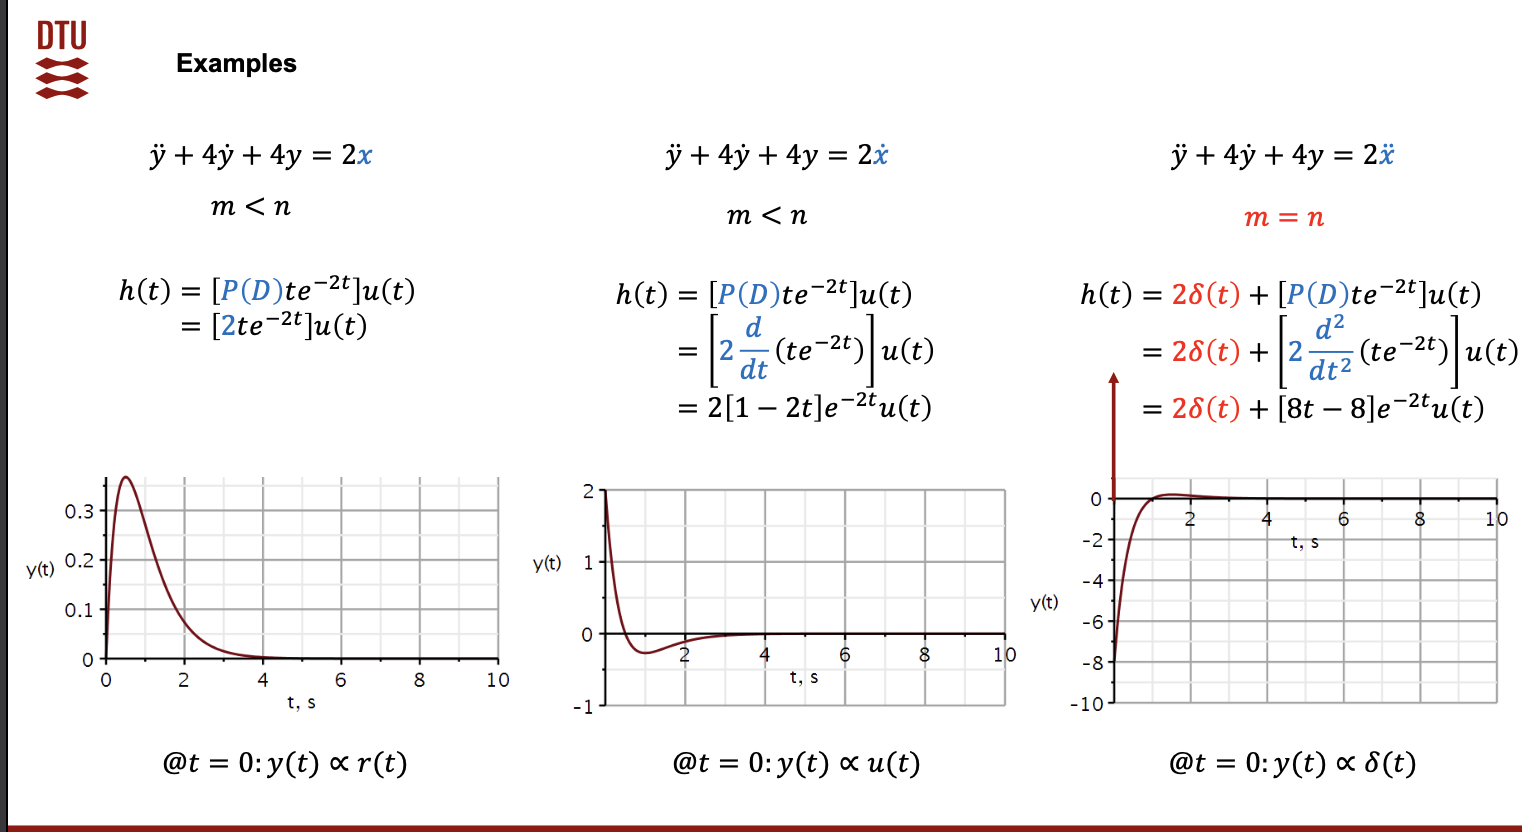

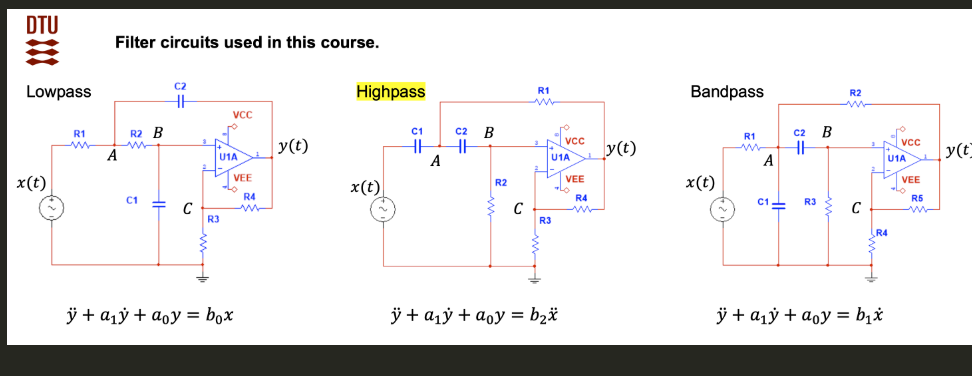

# 5

In [482]:
t, tau = symbols('t tau', real=True)

f1 = exp(-4*t) * Heaviside(t)
f2 = exp(-2*t) * Heaviside(-t)

# Convolution integral
y = integrate(f1 * f2, (tau, 0, t))
y = y * Heaviside(t)
display(y)
display(y.simplify().expand().collect(Heaviside(t)))

In [483]:
(exp(-4*t) + exp(-2*t)) 

In [484]:
exp(-6*t)

# 6

In [485]:
t, w = symbols('t w')

xe = exp(-4 * abs(t))
xo = -exp(-4 * abs(t)) * Heaviside(-t) + exp(-4 * abs(t)) * Heaviside(t)

Xe = fourier_transform(xe, t, w)
Xo = fourier_transform(xo, t, w)

display(simplify(Xe))
display(simplify(Xo))

In [486]:
conjugate(Xe)

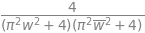

In [487]:
(Xe * conjugate(Xe)).simplify()

A wrong
B wrong


# 7

In [488]:
# t = symbols('t')
# a = symbols('a', real=True)
# w = symbols('omega', real=True)  # for angular frequency ω

# x_t = exp(a*t) * Heaviside(t)
# display(x_t)

# X_w = fourier_transform(x_t, t, w)
# display(X_w)

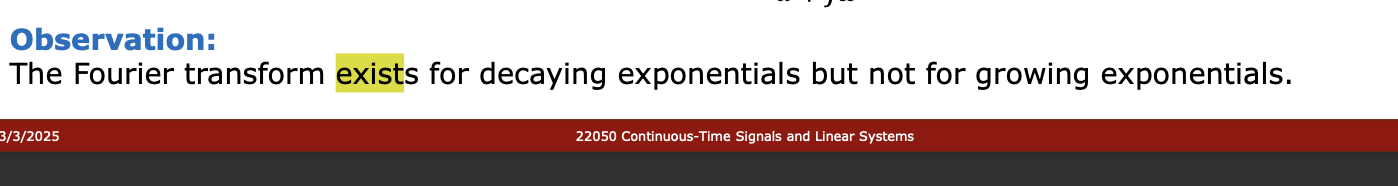

# 8

In [489]:
t = symbols('t')
w = symbols('omega', real=True)  # for angular frequency ω

x_t = exp(-3*t) * Heaviside(t)
display(x_t)

X_w = fourier_transform(x_t, t, w).subs(2*pi*w, w)
display(X_w)

In [490]:
# x_t = diff(x_t, t)
# X_w = fourier_transform(x_t, t, w).subs(2*pi*w, w)
# display(X_w)

In [491]:
# x_t = x_t.subs(t, 2*t)
# X_w = fourier_transform(x_t, t, w).subs(2*pi*w, w)
# display(X_w)

In [492]:
x_t2 = x_t * exp(I*2*t)
X_w = fourier_transform(x_t2, t, w).subs(2*pi*w, w)
display(X_w.simplify())

In [493]:
x_t_j3 = x_t * exp(I*2*t)
display(x_t_j3)

X_w_j3 = fourier_transform(x_t_j3, t, w)
display(X_w_j3)

correct

# 9

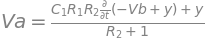

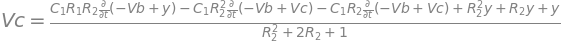

In [494]:
Va, Vb, Vc, x, y, C1, C2, R1, R2, R3, R4, t = symbols('Va Vb Vc x y C1 C2 R1 R2 R3 R4 t')

eqA = Eq( -( (y-Va) / R2) + Va-Vb , 0)
eqB = Eq( -C1*(Derivative((y-Vb), t)) + Vb/R1 , 0)
eqC = Eq( -(y-Vc) + (Vc-Va)/R2 + C1*Derivative((Vc-Vb), t), 0)

# Solve for Va, Vb, and Vc
solutions = solve([eqA, eqB, eqC], (Va, Vb, Vc))

# Display the solutions
for var, sol in solutions.items():
    # print(f"{var}: {sol}")
    display(Eq(var, sol))

In [495]:
# Solve for Vb in terms of Va
Vb_expr = solve(eqB, Vb)        # is this correct?

# Solve for y in terms of Vc
y_expr = solve(eqC, y)

# Display the expressions found
Vb_expr, y_expr

# 10

![Screenshot 2025-05-20 at 11.02.21.png](<attachment:Screenshot 2025-05-20 at 11.02.21.png>)
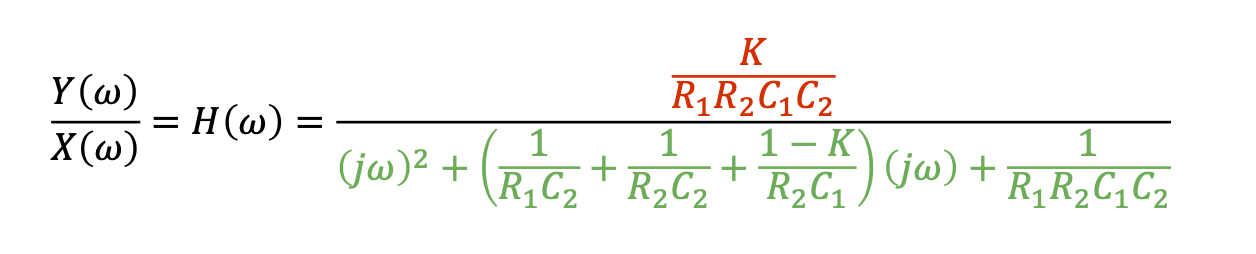

![Screenshot 2025-05-20 at 11.02.13.png](<attachment:Screenshot 2025-05-20 at 11.02.13.png>)

![Screenshot 2025-05-20 at 11.02.37.png](<attachment:Screenshot 2025-05-20 at 11.02.37.png>)

![Screenshot 2025-05-20 at 11.02.29.png](<attachment:Screenshot 2025-05-20 at 11.02.29.png>)
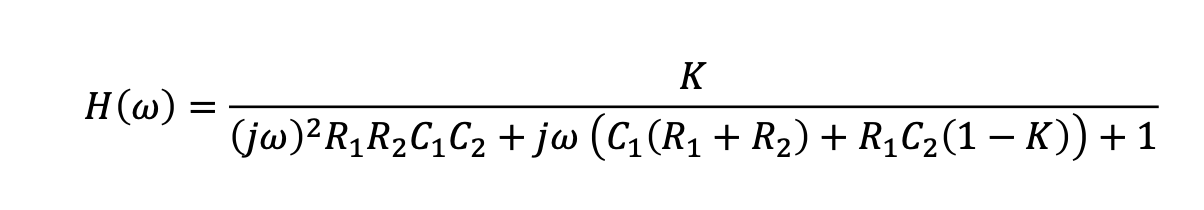
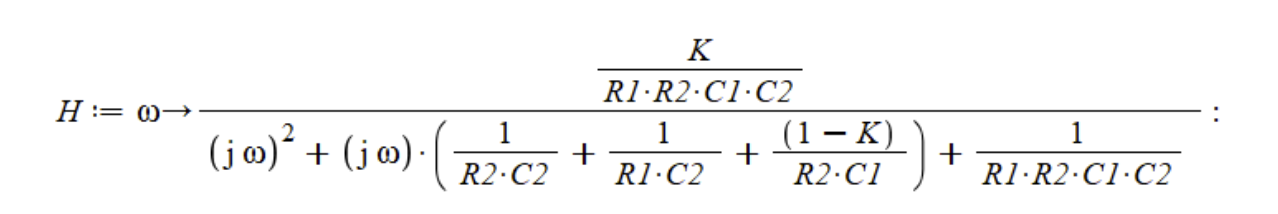
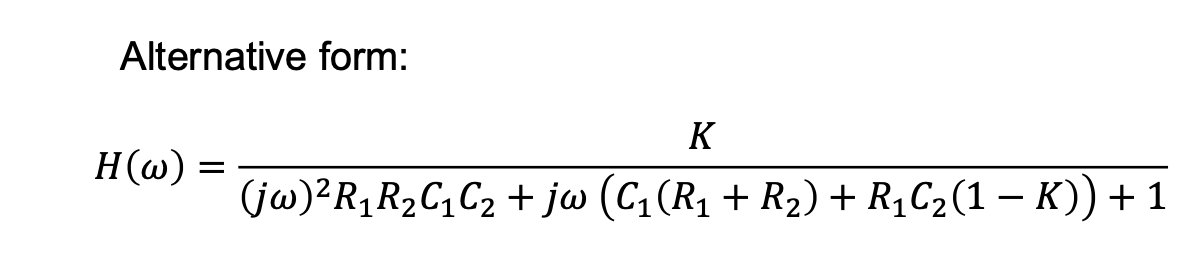

# 11

In [496]:
t = symbols('t', real=True, positive=True)
s = symbols('s')

Fa = 1 / ((s+1) * s)

F_list = [Fa]

In [497]:
f_list = []
for F in F_list:
    F_apart = apart(F, s)
    display(F_apart)
    f = inverse_laplace_transform(F_apart, s, t)
    f_list.append(f)

In [498]:
for f in f_list:
    # display(f)
    # display(f.collect(exp(-t)))
    display(f.simplify())

In [499]:
t = symbols('t', real=True, positive=True)
w0, s = symbols('w0 s')

a = exp(5*t) * Heaviside(t)

In [500]:
def F_s(f, t):
    integrand = f * exp(-s*t)
    return integrate(integrand, (t, -0, oo))

H_list = []
for f in [a]:
    F = F_s(f, t)
    H_list.append(F)
    display(F.simplify())


⎧       1                                                π        
⎪     ─────       for cos(│arg(s)│)⋅│s│ > 5 ∧ │arg(s)│ < ─ ∧ s ≠ 5
⎪     s - 5                                              2        
⎪                                                                 
⎪∞                                                                
⎨⌠                                                                
⎪⎮  t⋅(5 - s)                                                     
⎪⎮ ℯ          dt                     otherwise                    
⎪⌡                                                                
⎪0                                                                
⎩                                                                 

In [501]:
zero_list = []
pole_list = []
denom_list = []

for H_s in H_list:
    if isinstance(H_s, Piecewise):
        H_s = H_s.args[0][0]  # Extract the first expression (valid for ROC)
        display(H_s)

    H_s = H_s.together()
    num, denom = H_s.as_numer_denom()
    denom_list.append(denom)

    print(f"Numerator: {num}")
    print(f"Denominator: {denom}")

    # Extract poles and zeros
    zeros = solve(num, s)
    poles = solve(denom, s)

    zero_list.append(zeros)
    pole_list.append(poles)

display(zero_list) 
display(pole_list)
display(denom_list)

Numerator: -1
Denominator: 5 - s


In [502]:
# same as just finding the poles in principle
for denom in denom_list:
    sol = solve((Eq(denom, 0)), s)
    display(sol)

# 12

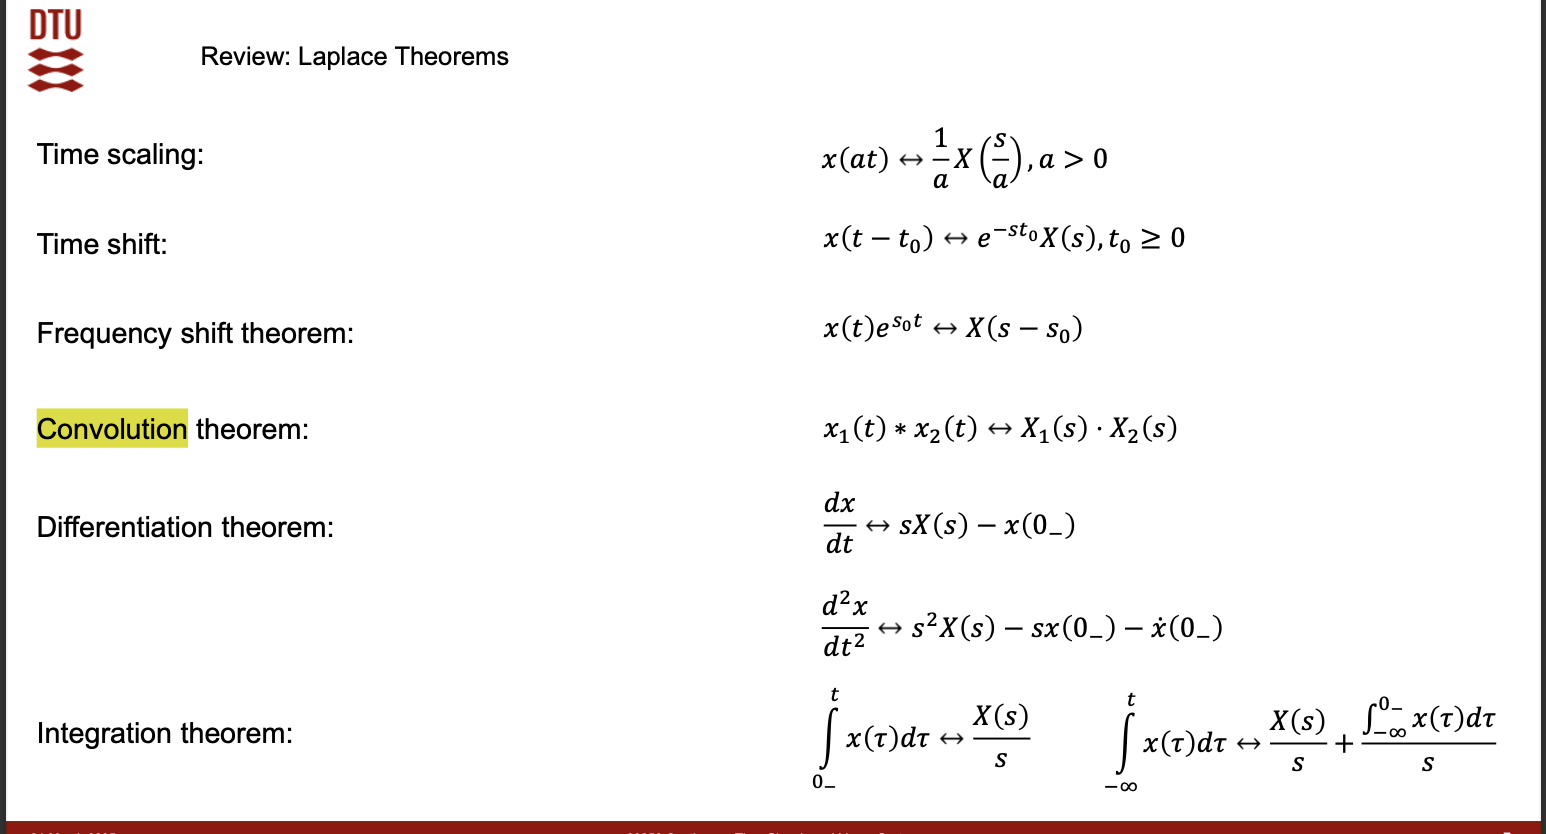


1 ..

2 wrong

3 wrong? the laplace of the impulse is the transfer function

# 13

In [503]:
t = symbols('t', real=True, positive=True)
s = symbols('s')

Fa = 2 / (s*(s+3))

F_list = [Fa]

In [504]:
f_list = []
for F in F_list:
    F_apart = apart(F, s)
    display(F_apart)
    f = inverse_laplace_transform(F_apart, s, t)
    f_list.append(f)

In [505]:
for f in f_list:
    # display(f)
    # display(f.collect(exp(-t)))
    y_t1 = f
    display(y_t1)
    y_t = f.subs(t, t-3)
    display(y_t)

In [506]:
H_s = laplace_transform(y_t, t, s)[0]
display(H_s)

1 wrong



In [507]:
y_t1

In [508]:
y_t1.subs(t, 0)

In [509]:
limit(y_t1, t, oo)

# 14

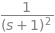

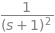

In [510]:
t = symbols('t', real=True, positive=True)
s = symbols('s')

Fa = 1 / (s**2 + 2*s + 1)

F_list = [Fa]
f_list = []
for F in F_list:
    F_apart = apart(F, s)
    display(F_apart)
    f = inverse_laplace_transform(F_apart, s, t)
    f_list.append(f)

for f in f_list:
    # display(f)
    # display(f.collect(exp(-t)))
    y_t = f
    display(y_t)

H_s = laplace_transform(y_t, t, s)[0]
display(H_s)

In [511]:
t = symbols('t', real=True)

# Define the step response
ystep = y_t * Heaviside(t)
print("\nStep response:")
display(ystep)

# 1. Ramp response (integral of step)
yramp = integrate(ystep, (t, 0, t))
print("\nRamp response:")
display(yramp)

# 2. Impulse response (derivative of step)
h = diff(ystep, t)
print("Impulse response:")
display(h)


Step response:



Ramp response:


Impulse response:


# 15

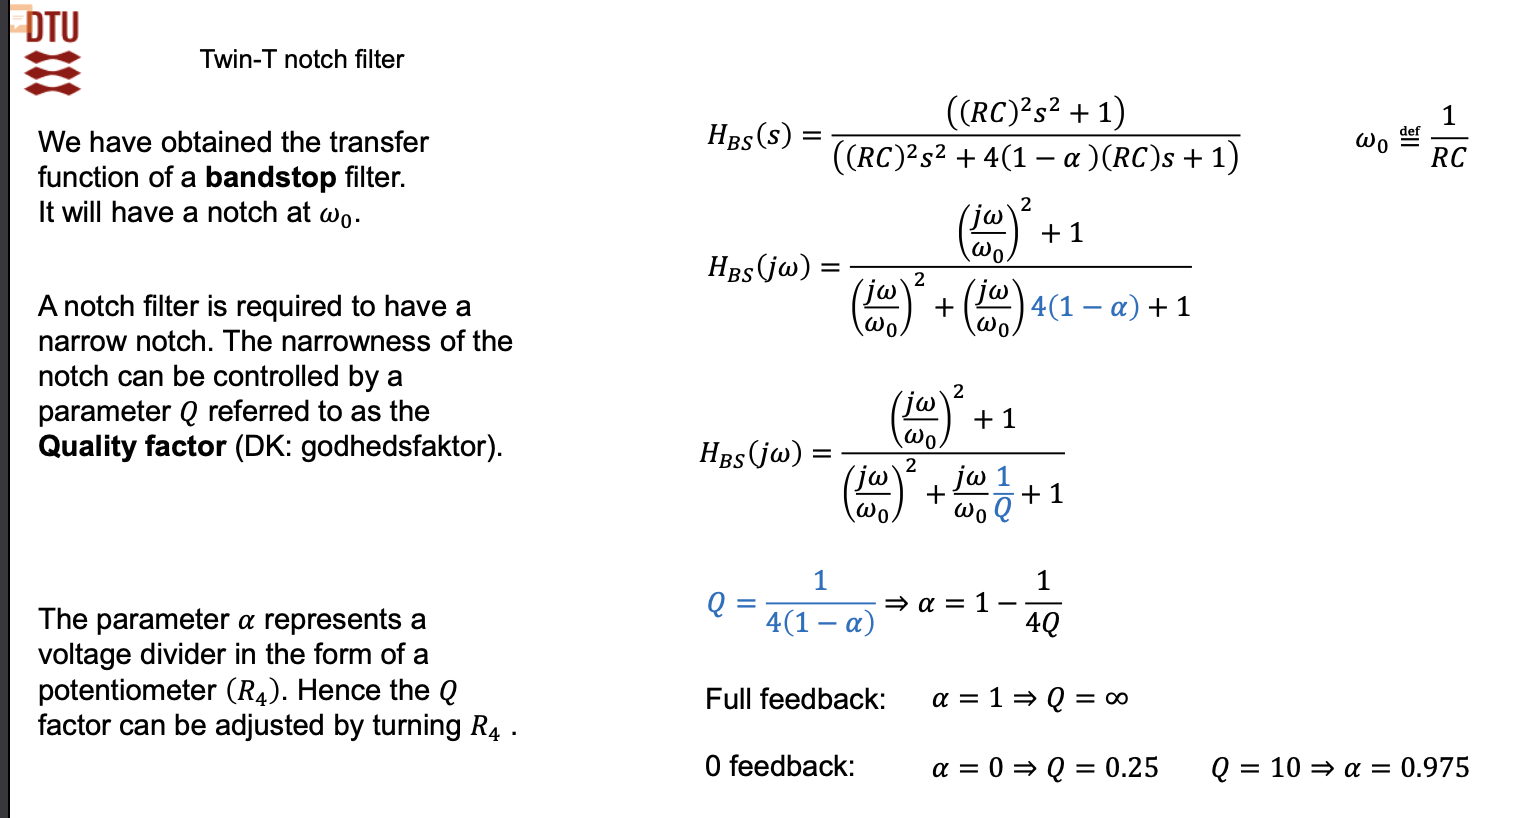

1 wrong

2 wrong

In [512]:

Q = 1 / (4*(1-(i/4)))


ZeroDivisionError: float division by zero

# 16

a (log decay factor):    0.6931
Damping ratio ζ:         0.2155
Natural frequency ω_n:   0.5362 rad/s
a1 = 2ζω_n:              0.2310
a0 = ω_n²:               0.2875

Differential equation:
y''(t) + 0.2310 y'(t) + 0.2875 y(t) = 0.2875 x(t)


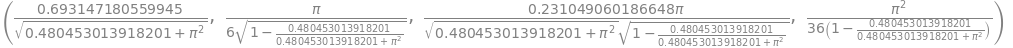

In [513]:
# all values have been eyballed from the step response graph
y_peak = 1.5  # peak value of the step response
y_final = 1.0 # final value of the step response (at infinity)
t_peak = 6 # time of peak (in seconds)

def percent_overshoot(y_peak, y_final, t_peak):
    # percent overshoot
    PO = ((y_peak - y_final) / y_final) * 100
    return PO

PO = percent_overshoot(y_peak, y_final, t_peak)
display(PO)

def identify_second_order_system(percent_overshoot, t_peak):
    # Step 1: Calculate 'a' from PO
    a = -log(percent_overshoot / 100)
    
    # Step 2: Damping ratio ζ
    zeta = a / sqrt(pi**2 + a**2)
    
    # Step 3: Natural frequency ω_n
    omega_n = pi / (t_peak * sqrt(1 - zeta**2))
    
    # Step 4: Coefficients for differential equation
    a1 = 2 * zeta * omega_n
    a0 = omega_n**2

    # Print results
    print(f"a (log decay factor):    {a:.4f}")
    print(f"Damping ratio ζ:         {zeta:.4f}")
    print(f"Natural frequency ω_n:   {omega_n:.4f} rad/s")
    print(f"a1 = 2ζω_n:              {a1:.4f}")
    print(f"a0 = ω_n²:               {a0:.4f}")
    
    print("\nDifferential equation:")
    print(f"y''(t) + {a1:.4f} y'(t) + {a0:.4f} y(t) = {a0:.4f} x(t)")
    
    return zeta, omega_n, a1, a0

identify_second_order_system(PO, t_peak) # t_peak = 0.5 seconds

a (log decay factor):    0.6931
Damping ratio ζ:         0.2155
Natural frequency ω_n:   0.5362 rad/s
a1 = 2ζω_n:              0.2310
a0 = ω_n²:               0.2875

Differential equation:
y''(t) + 0.2310 y'(t) + 0.2875 y(t) = 0.2875 x(t)


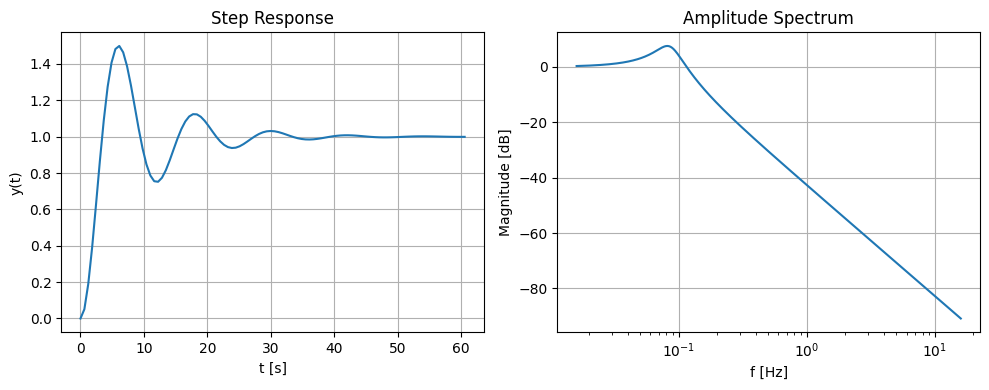

In [514]:
zeta, omega_n, a1, a0 = identify_second_order_system(PO, t_peak)

# Transfer function: H(s) = omega_n^2 / (s^2 + 2*zeta*omega_n*s + omega_n^2)
num = [a0]          # numerator = omega_n^2
den = [1, a1, a0]   # denominator = s^2 + a1*s + a0

system = signal.TransferFunction([float(a0)], [1.0, float(a1), float(a0)])

# STEP RESPONSE
t, y = signal.step(system)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y, label="Step response")
plt.xlabel("t [s]")
plt.ylabel("y(t)")
plt.title("Step Response")
plt.grid(True)

# FREQUENCY RESPONSE
w = np.logspace(-1, 2, 500)  # frequencies from 0.1 to 100 rad/s
w, mag, phase = signal.bode(system, w)

plt.subplot(1, 2, 2)
plt.semilogx(w/(2*np.pi), mag)  # Convert rad/s to Hz
plt.xlabel("f [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title("Amplitude Spectrum")
plt.grid(True)

plt.tight_layout()
plt.show()

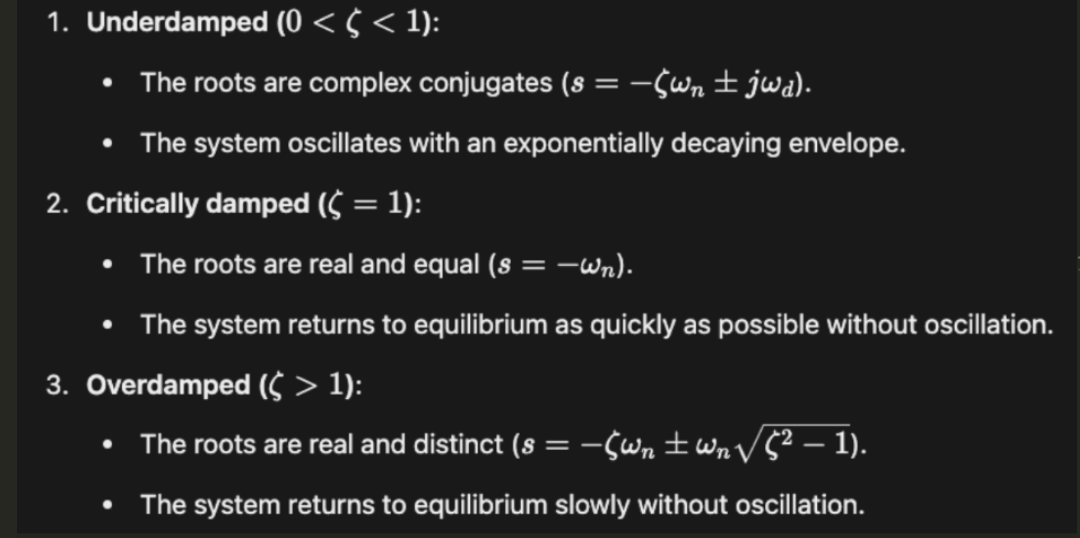

1 wrong

2 wrong




# 17

1 wrong

2 wrong

3 H C yes, A ?

# 18

# 19

# 20

A 